In [1]:
from sklearn import tree
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Read csv file in pandas
df_bp = pd.read_csv("BPTrunc2_train.csv")
df_bp.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,6319,Female,79.0,0,0,Yes,Private,Urban,97.93,31.2,NaN,0
1,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,68249,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,NaN,0
3,55232,Female,38.0,0,0,Yes,Private,Rural,79.83,27.9,smokes,0
4,29865,Female,21.0,0,0,No,Private,Rural,89.44,21.9,smokes,0


In [3]:
# Change strings to '0' and '1'
df_bp['gender'].replace('Male',1, inplace=True)
df_bp['gender'].replace('Female',0, inplace=True)
df_bp['gender'].replace('Other',0,inplace=True)

df_bp['ever_married'].replace('Yes',1, inplace=True)
df_bp['ever_married'].replace('No',0, inplace=True)

df_bp['Residence_type'].replace('Urban',1, inplace=True)
df_bp['Residence_type'].replace('Rural',0, inplace=True)

df_bp['smoking_status'].replace('smokes',1, inplace=True)
df_bp['smoking_status'].replace('never smoked',0, inplace=True)
df_bp['smoking_status'].replace('formerly smoked',1, inplace=True)

In [4]:
# Drop columns that are not relevant
BPdata = df_bp.drop(["id","work_type"], axis=1)
feature_names = BPdata.columns
BPdata.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,79.0,0,0,1,1,97.93,31.2,NaN,0
1,1,67.0,0,1,1,1,228.69,36.6,1.0,1
2,0,27.0,0,0,1,0,85.60,21.4,NaN,0
3,0,38.0,0,0,1,0,79.83,27.9,1.0,0
4,0,21.0,0,0,0,0,89.44,21.9,1.0,0


In [5]:
# Fill NaNs with zeros
# BPdata[BPdata.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
BPdata = BPdata.fillna(0.0)

In [6]:
# Check data types in each column
print(BPdata.dtypes)

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status       float64
stroke                 int64
dtype: object


In [7]:
# Check non-zero values in each column
BPdata.astype(bool).sum(axis=0)

gender               196
age                  433
hypertension          58
heart_disease         34
ever_married         297
Residence_type       232
avg_glucose_level    433
bmi                  402
smoking_status       143
stroke                75
dtype: int64

In [8]:
# Select X and y data
X = BPdata.iloc[:, 0:9].values  
y = BPdata.iloc[:, 9].values  

In [13]:
import scipy
import sklearn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor



# Check various Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
# validation_size = 0.20
# seed=7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.2, random_state=7)
scoring = 'accuracy'

results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        msg = "%s: %f (%f), %f" % (name, cv_results.mean(), cv_results.std(),accuracy_score(y_test, predictions) )
        print(msg)

LR: 0.852689 (0.071775), 0.850575
LDA: 0.846807 (0.065259), 0.862069
KNN: 0.855882 (0.090101), 0.816092
CART: 0.794622 (0.059148), 0.839080
NB: 0.840756 (0.076791), 0.781609
SVM: 0.818151 (0.069790), 0.862069


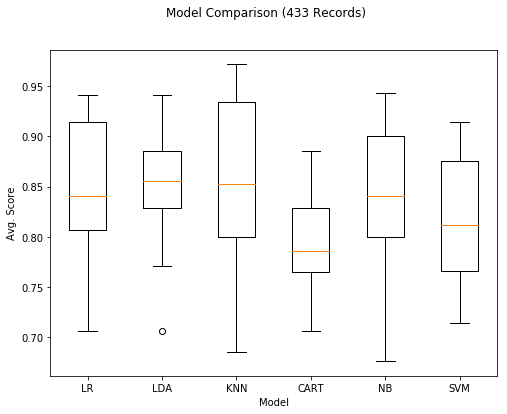

In [14]:
# Compare Algorithms
plt.rcParams["figure.figsize"] = (8,6)
fig = plt.figure()
fig.suptitle('Model Comparison (433 Records)')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Avg. Score')
plt.xlabel('Model')
ax.set_xticklabels(names)
plt.show()
# plt.savefig('stroke433records.jpg')

In [15]:
# Make predictions using Gaussian on validation dataset
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.850574712644
[[71  4]
 [ 9  3]]
             precision    recall  f1-score   support

          0       0.89      0.95      0.92        75
          1       0.43      0.25      0.32        12

avg / total       0.82      0.85      0.83        87



In [16]:
# Accuracy score on test data
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

scores = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    names.append(name) 
    print("%s: %f" % (name, accuracy_score(y_test, predictions)))
    

LR: 0.850575
LDA: 0.862069
KNN: 0.816092
CART: 0.816092
NB: 0.781609
SVM: 0.862069


In [17]:
# Prediction based on inputs
lr = LogisticRegression()
lr.fit(X_train, y_train)
# gender, age, hypertension, heart disease, ever married, residence type, glucose level, bmi, smoking status
X_input= [[0, 60, 1, 1, 1, 1, 60, 32, 1]]

prediction = lr.predict(X_input)
print("Stroke Probability(0:Lo, 1:Hi):", prediction)

Stroke Probability(0:Lo, 1:Hi): [0]
